In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set()

In [2]:
df = pd.read_csv('./ui_timeseries.csv', sep=',')

df.head()

,Unnamed: 0,Series,Periode,Permintaan (unit)
0,0,1,04/07/2008,19210
1,1,2,04/14/2008,18650
2,2,3,04/21/2008,14309
3,3,4,04/28/2008,25226
4,4,5,05/5/2008,24377


In [3]:
df.shape

(96, 4)

In [4]:
df = df[['Periode', 'Permintaan (unit)']]

df.set_index('Periode', inplace=True)

df.head()

,Permintaan (unit)
Periode,
04/07/2008,19210
04/14/2008,18650
04/21/2008,14309
04/28/2008,25226
05/5/2008,24377


In [5]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Permintaan (unit)'])

adf_df = pd.DataFrame(columns=['Statistic Test', 'p-value', 'No. of lag used', 'No. of observation', 
                               'Critical value (1%)', 'Critical value (5%)', 'Critical value (10%)'], 
                               data=[[adf_test[0], adf_test[1], adf_test[2], adf_test[3], 
                                     adf_test[4]['1%'], adf_test[4]['5%'], adf_test[4]['10%']]])

adf_df

,Statistic Test,p-value,No. of lag used,No. of observation,Critical value (1%),Critical value (5%),Critical value (10%)
0,-1.180771,0.681812,10,85,-3.509736,-2.896195,-2.585258


In [6]:
df = df.diff(1).dropna()

adf_test = adfuller(df['Permintaan (unit)'])

adf_df = pd.DataFrame(columns=['Statistic Test', 'p-value', 'No. of lag used', 'No. of observation', 
                               'Critical value (1%)', 'Critical value (5%)', 'Critical value (10%)'], 
                               data=[[adf_test[0], adf_test[1], adf_test[2], adf_test[3], 
                                     adf_test[4]['1%'], adf_test[4]['5%'], adf_test[4]['10%']]])

adf_df

# H0 (hipotesis 0): p-value < 0.05 (treeshold), berarti stasioner
# H1 (hipotesis 0): p-value > 0.05 (treeshold), berarti stasioner
# karena nilai p-value dibawah 0.05 maka menerima H0 (hipotesis 0) nilai d nya adalah 1

,Statistic Test,p-value,No. of lag used,No. of observation,Critical value (1%),Critical value (5%),Critical value (10%)
0,-3.500117,0.007984,9,85,-3.509736,-2.896195,-2.585258


<Axes: xlabel='Periode'>

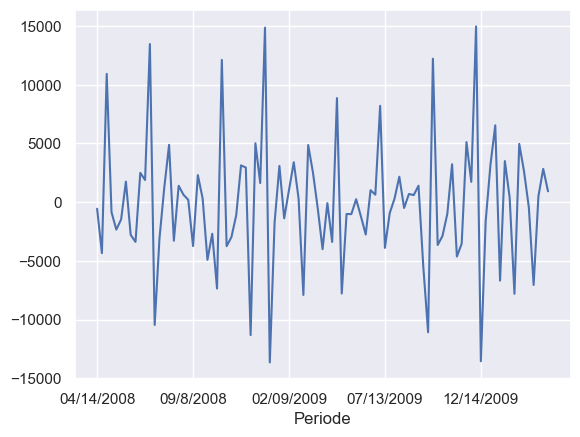

In [7]:
df['Permintaan (unit)'].plot(kind='line')

In [8]:
import math

test_size = math.ceil(df.shape[0] * 20 / 100)
train_size = df.shape[0] - test_size

train_df = df.iloc[:-test_size]

train_df

,Permintaan (unit)
Periode,
04/14/2008,-560.0
04/21/2008,-4341.0
04/28/2008,10917.0
05/5/2008,-849.0
05/12/2008,-2338.0
...,...
10/5/2009,-3648.0
10/12/2009,-2876.0
10/19/2009,-1008.0


In [9]:
test_df = df.iloc[(train_size-1):]

test_df.head(5)

,Permintaan (unit)
Periode,
11/2/2009,-4628.0
11/09/2009,-3540.0
11/16/2009,5112.0
11/23/2009,1726.0
12/7/2009,14954.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


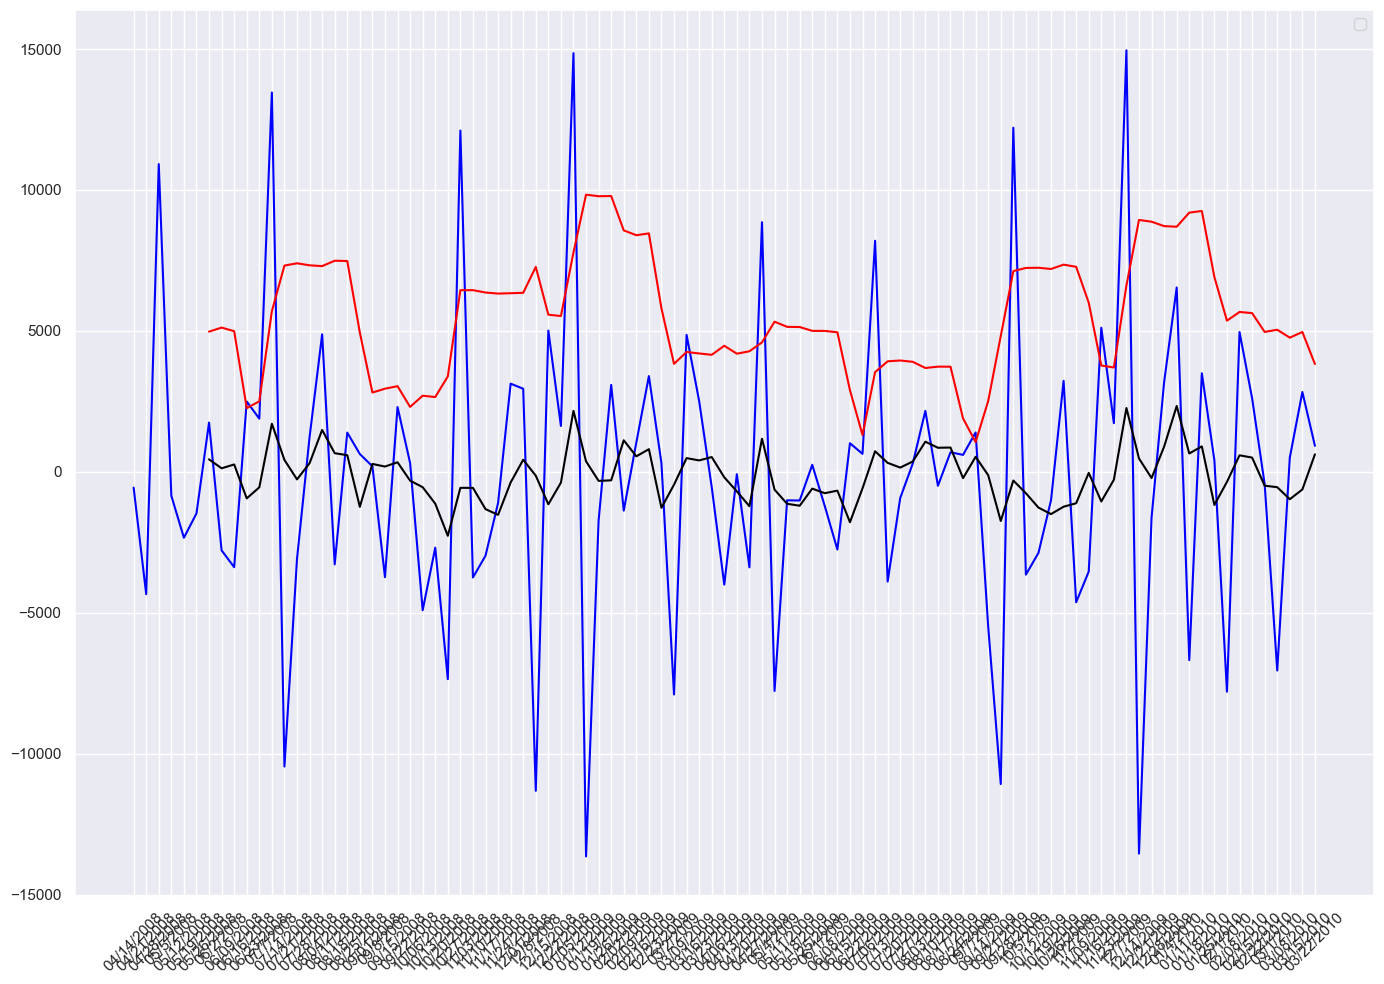

In [10]:
plt.figure(figsize=(14,10))

plt.plot(df['Permintaan (unit)'], color='blue')
plt.plot(df['Permintaan (unit)'].rolling(7).mean(), color='black')
plt.plot(df['Permintaan (unit)'].rolling(7).std(), color='red')

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


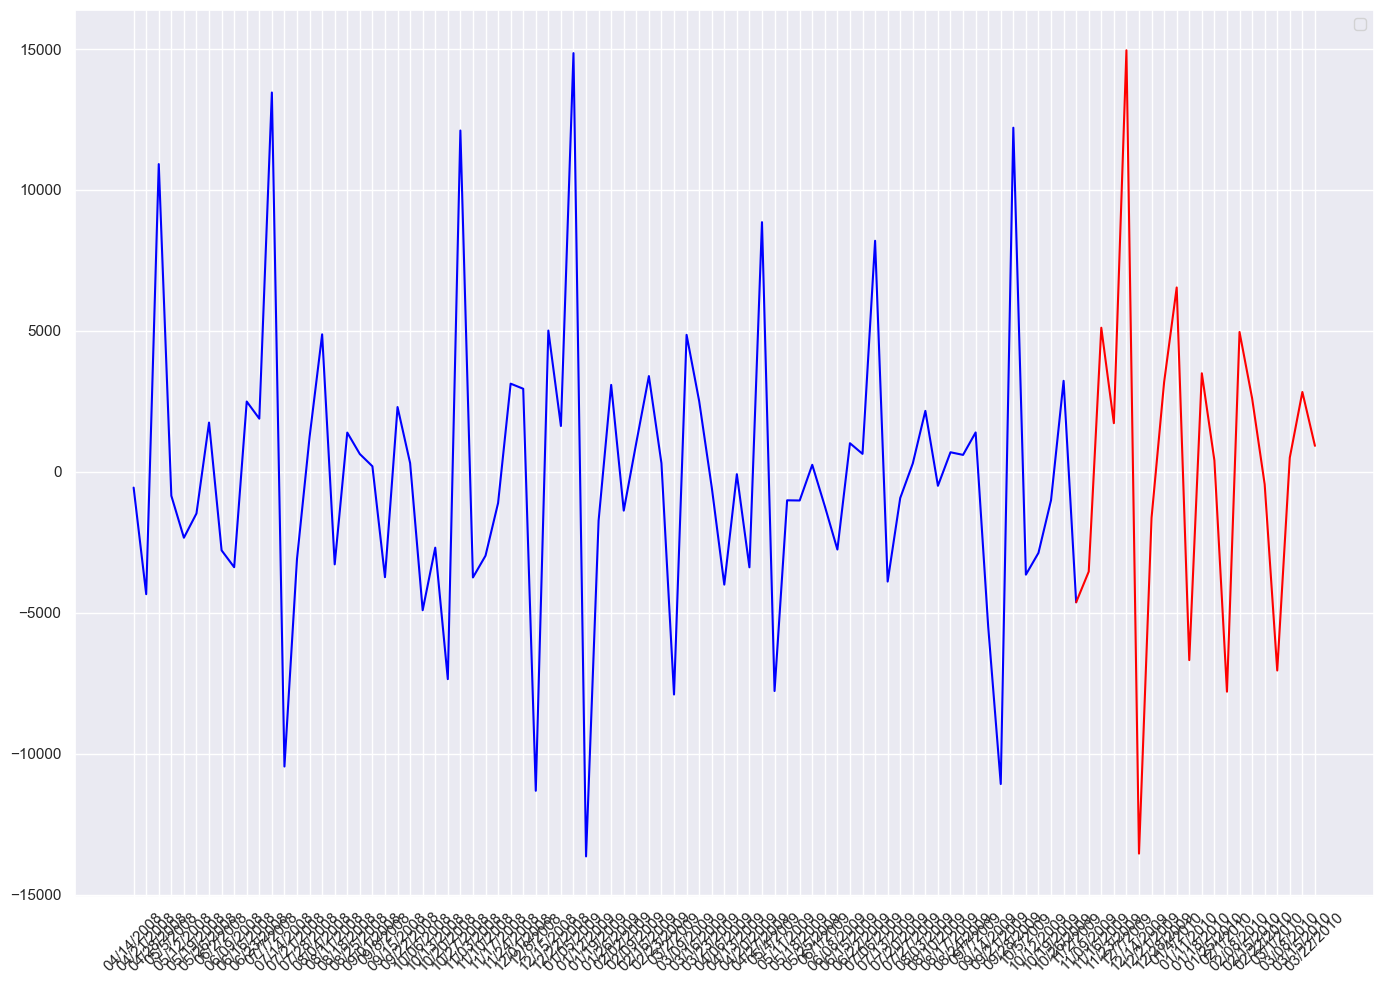

In [11]:
plt.figure(figsize=(14,10))

plt.plot(train_df['Permintaan (unit)'], color='blue')
plt.plot(test_df['Permintaan (unit)'], color='red')

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(loc='best')

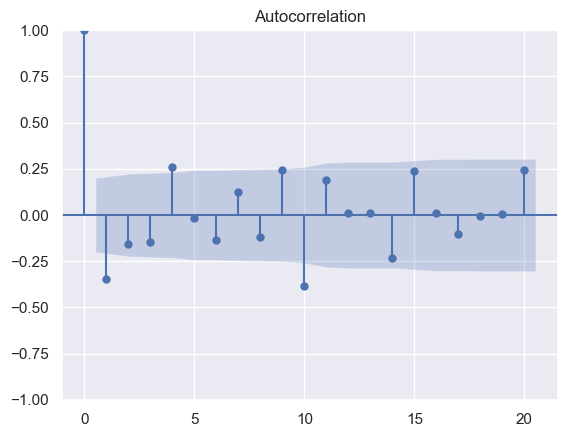

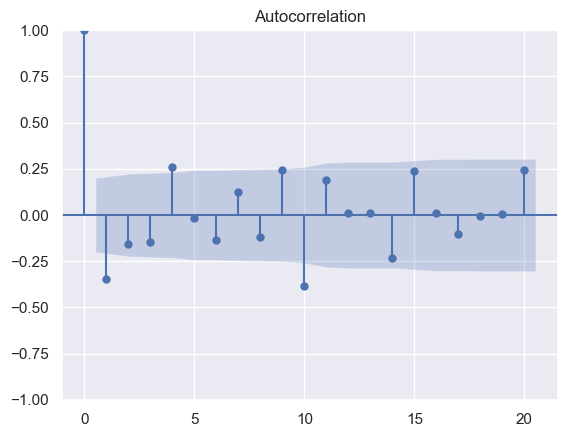

In [12]:
# signifikan pada lag ke-1 pada correlogram AFC, maka nilai q = 1

plot_acf(df['Permintaan (unit)'])

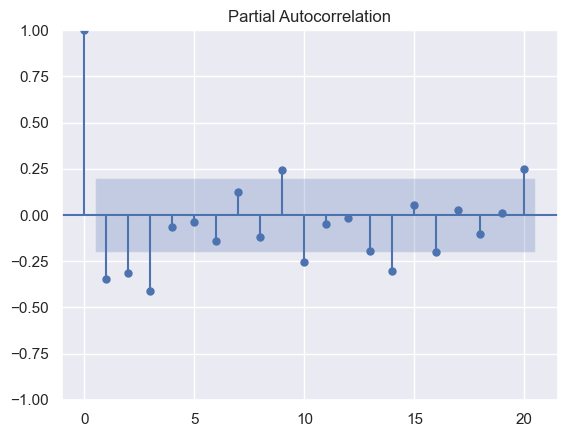

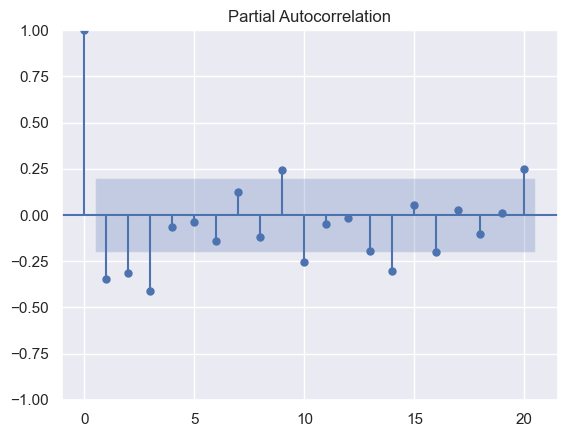

In [13]:
# signifikan pada lag ke-3 pada correlogram PAFC, maka nilai p = 1

plot_pacf(df['Permintaan (unit)'])

perkiraan model yang dapat dibangun

1. Dilakukan diferensiasi 1 kali, maka nilai parameter d = 1
2. Pada correlogram ACF, signifikan pada lag ke-1, maka nilai parameter q = 1
2. Pada correlogram PACF, signifikan pada lag ke-1, maka nilai parameter p = 1

In [14]:
# Belum divalidasi

model = auto_arima(train_df, trace=True)
model.fit(train_df)

forecast = model.predict(n_periods=test_size)

forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1505.922, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1522.505, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1514.103, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1498.928, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1520.612, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1498.254, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1499.757, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1499.532, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1512.291, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1501.474, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.579 seconds


c:\Users\62877\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\62877\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


76    2941.157431
77       0.000000
78       0.000000
79       0.000000
80       0.000000
81       0.000000
82       0.000000
83       0.000000
84       0.000000
85       0.000000
86       0.000000
87       0.000000
88       0.000000
89       0.000000
90       0.000000
91       0.000000
92       0.000000
93       0.000000
94       0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


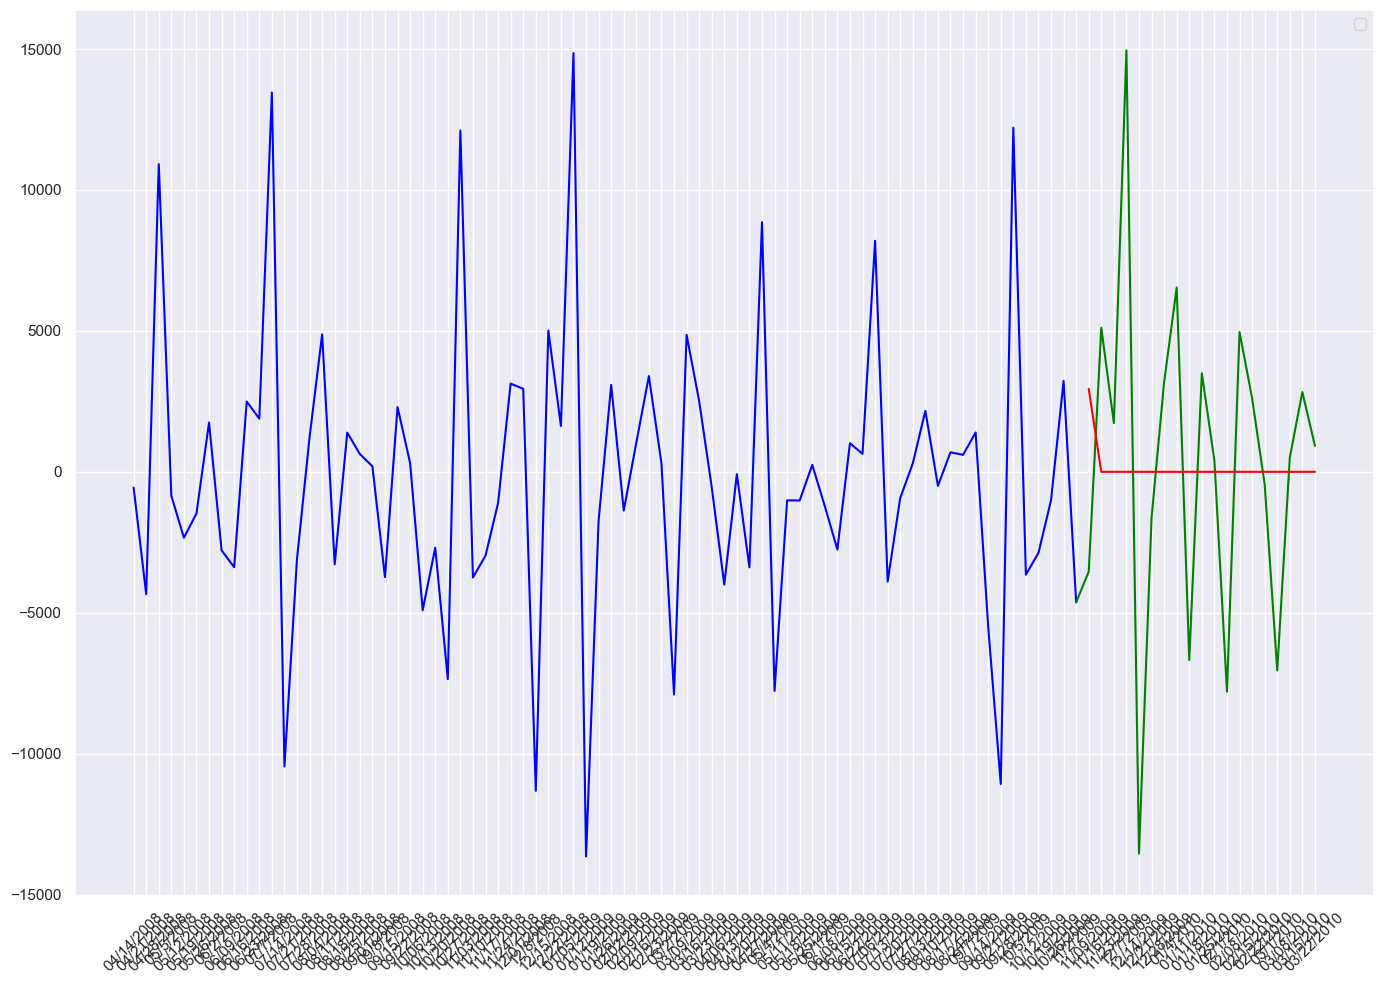

In [15]:
plt.figure(figsize=(14,10))

plt.plot(train_df['Permintaan (unit)'], color='blue')
plt.plot(test_df['Permintaan (unit)'], color='green')
plt.plot(forecast, color='red')

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(loc='best')